### This  file is specific to preprocessing and first-round data cleaning requirements. Take the new JSON files generated from here and use it separately for the purposes of exploration and modelling

In [1]:
import numpy as np
import scipy
import random
import urllib
import matplotlib.pyplot as plt
import json

In [2]:
random.seed(0) #set an initial seed so that we can reproduce consistently

In [3]:
def readJSONfromFile(fname):
    yelp_data = []
    with open(fname) as f:
        for line in f:
            yelp_data.append(json.loads(line))
    return yelp_data

In [4]:
Iu = readJSONfromFile('data/yelp_Iu.json')

In [5]:
Iu = Iu[0]

In [6]:
len(Iu)

721779

In [7]:
Iu['PmgqNO0-5Y3e3UoR61TD7w']

[u'4P-vTvE6cncJyUyLh73pxw',
 u'cF98fzqrMnikhXhuSz6ruQ',
 u'mlCDsdVFuZvRGrJTfQ6amw',
 u'PjQngP_7m7PA8K1WUHdXqg',
 u'Mgvs9XPJpR2Vo5D4Tb59sA',
 u'xsTagHpGvtH5WoDJJGnq7Q',
 u'j6MtKpKdqZC2wXnQetGBIQ',
 u'n3cFalLLuMyAy3Oe2dcwQw',
 u'LNsZJP6jZ11e0tDljOLPiQ',
 u'0i95sgY7pzYW9k88SOVJ8A',
 u'bkwXWFCRGra9q2lfYDTIBA',
 u'eoJfl5vG7X87QhcKb0nt5Q',
 u'cYwJA2A6I12KNkm2rtXd5g',
 u'L6-rMdUvJXGUzrNdhiNT6A',
 u'K7lWdNUhCbcnEvI0NhGewg',
 u'OF19lUVQHj8pVaSACNewWg',
 u'1t2UKl2k59iMdNhCfppLcQ',
 u'z45xS0Kc6GpiITwrpkRVdQ',
 u'n0NH0FW8NU3zfeJY3QluMQ',
 u'Ay2hfgpp8kELkwy76BRWLQ',
 u'hyyy_yFDI3CJJaG3uROGBA']

In [8]:
I = readJSONfromFile('data/yelp_restaurant_data.json')

In [9]:
I = I[0]

In [10]:
AllRest = []
for i in I:
    AllRest.append(i['business_id'])

In [11]:
np.random.rand(10)

array([ 0.77020861,  0.74269731,  0.35839344,  0.53606147,  0.15350045,
        0.72483851,  0.48716318,  0.78949475,  0.25375352,  0.935919  ])

In [12]:
AllUser = Iu.keys()

In [13]:
len(AllUser)

721779

In [14]:
len(AllRest)

48485

In [15]:
AllRestSet = set(AllRest)

In [108]:
Lambda = 3
Alpha = 10**-5
K = 100

In [109]:
Gamma_u = {}
Gamma_r = {}

In [110]:
for user in AllUser:
    Gamma_u[user] = np.random.rand(K)
for rest in AllRest:
    Gamma_r[rest] = np.random.rand(K)

In [111]:
def logit(t):
    return np.exp(-t)/(1+np.exp(-t))

In [112]:
def sigmoid(t):
    return 1-logit(t)

In [113]:
import math
def vlen(t):
    su = 0
    for i in t:
        su += i*i
    return su

In [114]:
CUser = []
Cirest = []
Cjrest = []
iterations = 1000
l=[]

In [115]:
def loss(CUser,Cirest,Cjrest):
    su = 0
    for i in range(len(CUser)):
        user = CUser[i]
        irest = Cirest[i]
        jrest = Cjrest[i]
        xuij = np.dot(Gamma_u[user],Gamma_r[irest]-Gamma_r[jrest])
        su += np.log(sigmoid(xuij))
    for user in CUser:
        su -= Lambda* vlen(Gamma_u[user])
    for rest in Cirest:
        su -= Lambda* vlen(Gamma_r[rest])
    for rest in Cjrest:
        su -= Lambda* vlen(Gamma_r[rest])
    return su*1.0/len(CUser)

In [116]:
# for i in range(iterations):
#     user = random.choice(Iu.keys())
#     CUser.append(user)
#     irest = random.choice(Iu[user])
#     Cirest.append(irest)
#     jrest = random.choice(list(AllRestSet - set(Iu[user])))
#     Cjrest.append(jrest)
# for i in range(iterations):
#     user = CUser[i]
#     irest = Cirest[i]
#     jrest = Cjrest[i]
#     xuij = np.dot(Gamma_u[user],Gamma_r[irest]-Gamma_r[jrest])
#     Gamma_u[user] += Alpha*(logit(xuij)*(Gamma_r[irest]-Gamma_r[jrest]) + Lambda*Gamma_u[user])
#     Gamma_r[irest]+= Alpha*(logit(xuij)*(Gamma_u[user]) + Lambda*Gamma_r[irest])
#     Gamma_r[jrest]+= Alpha*(logit(xuij)*(-Gamma_u[user]) + Lambda*Gamma_r[jrest])
#     l.append(loss(CUser,Cirest,Cjrest))

In [117]:
# plt.plot(range(iterations),l)
# plt.show()

In [ ]:
for i in range(iterations):
    user = random.choice(Iu.keys())
    CUser.append(user)
    irest = random.choice(Iu[user])
    Cirest.append(irest)
    jrest = random.choice(list(AllRestSet - set(Iu[user])))
    Cjrest.append(jrest)
    xuij = np.dot(Gamma_u[user],Gamma_r[irest]-Gamma_r[jrest])
#     x = Alpha*(logit(xuij)*(Gamma_r[irest]-Gamma_r[jrest]) + Lambda*Gamma_u[user])
#     y = Alpha*(logit(xuij)*(Gamma_u[user]) + Lambda*Gamma_r[irest])
#     z = Alpha*(logit(xuij)*(-Gamma_u[user]) + Lambda*Gamma_r[jrest])
    x= Alpha*(logit(xuij)*(Gamma_r[irest]-Gamma_r[jrest]))
    y = Alpha*(logit(xuij)*(Gamma_u[user]))
    z = Alpha*(logit(xuij)*(-Gamma_u[user]))
    for user in CUser:
        x += Alpha*Lambda*Gamma_u[user]
    for rest in Cirest:
        y += Alpha*Lambda*Gamma_r[irest]
    for rest in Cjrest:
        z += Alpha*Lambda*Gamma_r[jrest]
    Gamma_u[user] += x
    Gamma_r[irest] += y
    Gamma_r[jrest] += z
    l.append(loss(CUser,Cirest,Cjrest))

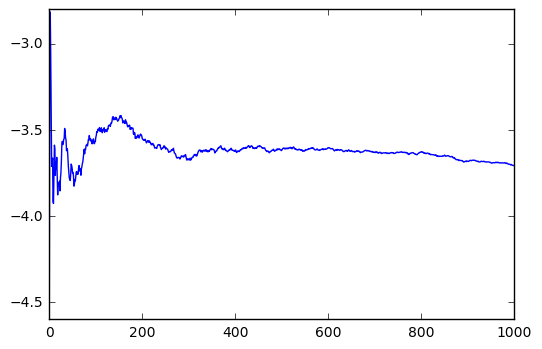

In [107]:
plt.plot(range(iterations),l)
plt.show()

In [5]:
print("The dataset has {} businesses".format(len(data)))

The dataset has 144072 businesses


In [6]:
data[11]

{u'address': u'1500 N Green Valley Pkwy, Ste 230',
 u'attributes': [u'Alcohol: none',
  u"Ambience: {'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}",
  u'BusinessAcceptsCreditCards: True',
  u"BusinessParking: {'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
  u'Caters: True',
  u'GoodForKids: True',
  u"GoodForMeal: {'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'breakfast': False, 'brunch': False}",
  u'HasTV: True',
  u'NoiseLevel: quiet',
  u'OutdoorSeating: False',
  u'RestaurantsAttire: casual',
  u'RestaurantsDelivery: False',
  u'RestaurantsGoodForGroups: True',
  u'RestaurantsPriceRange2: 1',
  u'RestaurantsReservations: False',
  u'RestaurantsTableService: False',
  u'RestaurantsTakeOut: True',
  u'WiFi: no'],
 u'business_id': u'42romV8altAeuZuP2OC1gw',
 u'categories': [u'Hawaiian', u'Restaurants', u'Barbeq

### Restaurant Data preprocessing

#### We only want restaurant data. Yelp data is clean, in the sense that every business which is a restaurant, has a restaurant category at the least. Bakeries or sometime coffee places are not tagged restaurant, which is acceptable

In [7]:
restaurant_data = []
restaurant_id_set = set()   #set of ids of business = restaurant useful for processing of other json files
for business in data:
    if business["categories"]!= None and "Restaurants" in business["categories"]:
        restaurant_data.append(business)
        restaurant_id_set.add(business["business_id"])
        

In [8]:
print("The number of businesses which are just restaurants is {}".format(len(restaurant_data)))

The number of businesses which are just restaurants is 48485


In [9]:
with open('yelp_restaurant_data.json', 'w') as outfile:
    json.dump(restaurant_data, outfile)


### User review data processing
#### Choose only those reviews pertaining to restaurants and store the reduced set of reviews

In [10]:
yelp_user_review_data = []
with open("data/yelp_academic_dataset_review.json", "U") as f:
    for line in f:
        review = json.loads(line)
        if review["business_id"] in restaurant_id_set:
            yelp_user_review_data.append(review)

In [11]:
print("Number of user reviews pertaining to restaurants is {}".format(len(yelp_user_review_data)))

Number of user reviews pertaining to restaurants is 2577298


In [12]:
with open('yelp_user_review_data.json', 'w') as outfile:
    json.dump(yelp_user_review_data, outfile)

In [13]:
f.close()
outfile.close()

In [15]:
yelp_user_review_data[0]

{u'business_id': u'4P-vTvE6cncJyUyLh73pxw',
 u'cool': 0,
 u'date': u'2014-03-29',
 u'funny': 0,
 u'review_id': u'6-hKBi-6RC3g7Mft0c-6qw',
 u'stars': 4,
 u'text': u'This place is a area staple! Been around for years and not much has changed - I see this as a good thing! Stable and reliable!\n\nMy family goes every year for St. Pattys Day corn beef! Very nice place for a bar night dinner, or to catch up with some friends over drinks!',
 u'type': u'review',
 u'useful': 0,
 u'user_id': u'PmgqNO0-5Y3e3UoR61TD7w'}

In [19]:
I_u = {}
U_i = {}

In [52]:
cutoff= 400000

In [57]:
for datum in yelp_user_review_data:
    if I_u.has_key(datum['business_id']):
        I_u[datum['business_id']].append(datum['stars'])
    else:
        I_u[datum['business_id']] = [datum['stars']]
    if U_i.has_key(datum['user_id']):
        U_i[datum['user_id']].append(datum['stars'])
    else:
        U_i[datum['user_id']] = [datum['stars']]
    

In [58]:
len(I_u['4P-vTvE6cncJyUyLh73pxw'])

92

In [96]:
thresh = 10

In [97]:
len_u = []
len_i = []
for k in I_u.keys():
    if len(I_u[k]) > thresh:
        len_i.append(len(I_u[k]))
for k in U_i.keys():
    if len(U_i[k]) > thresh:
        len_u.append(len(U_i[k]))
    

In [105]:
import numpy
avg_u = []
avg_i = []
for k in I_u.keys():
    if len(I_u[k]) > thresh:
        avg_i.append(numpy.mean(I_u[k]))
for k in U_i.keys():
    if len(U_i[k]) > thresh:
        avg_u.append(numpy.mean(U_i[k]))
    

In [92]:
len_u = []
len_i = []
for k in I_u.keys():
    len_i.append(len(I_u[k]))
for k in U_i.keys():
    len_u.append(len(U_i[k]))
    

In [98]:
len_u.sort()
len_u = len_u[:int(len(len_u)*0.99)]

In [103]:
len_i.sort()
len_i = len_i[:int(len(len_i)*0.99)]

I_u[I_u.keys()[0]]

len(len_i)

count = 0
for i in len_i:
    if i > 10:
        count +=1
print(count)

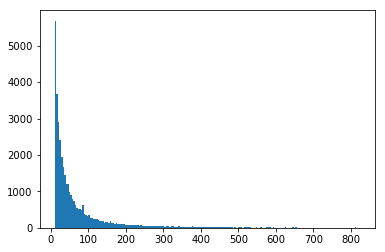

In [104]:
import matplotlib.pyplot as plt

plt.hist(len_i,bins=200)
plt.show()

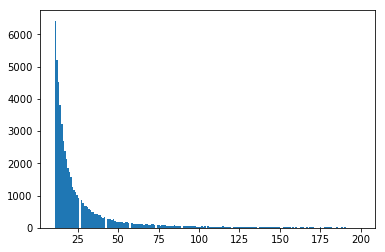

In [102]:
plt.hist(len_u,bins=200)
plt.show()

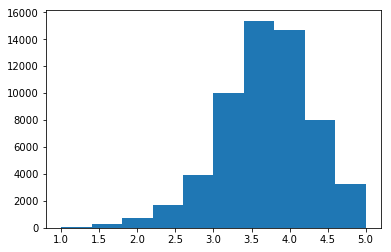

In [106]:
plt.hist(avg_u)
plt.show()

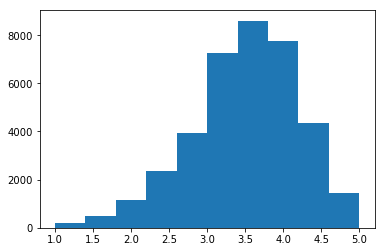

In [107]:
plt.hist(avg_i)
plt.show()

In [124]:
latitudes = [[],[],[],[]]
longitudes = [[],[],[],[]]
for datum in restaurant_data:
    if datum['stars'] == 5:
        latitudes[-1].append(datum['latitude'])
        longitudes[-1].append(datum['longitude']) 
    else:
        latitudes[int(datum['stars'])-1].append(datum['latitude'])
        longitudes[int(datum['stars'])-1].append(datum['longitude'])

In [114]:
latitudes[0]

43.661054

In [126]:
import gmplot

gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)

# gmap.plot(latitudes, longitudes, 'cornflowerblue', edge_width=10)
# gmap.scatter(more_lats, more_lngs, '#3B0B39', size=40, marker=False)
# gmap.scatter(marker_lats, marker_lngs, 'k', marker=True)
# gmap.heatmap(latitudes, longitudes)

gmap.scatter(latitudes[0], longitudes[0],'#c41d00', size=40, marker=False)
gmap.scatter(latitudes[1], longitudes[1],'#fc9a10', size=40, marker=False)
gmap.scatter(latitudes[2], longitudes[2],'#fcf811', size=40, marker=False)
gmap.scatter(latitudes[3], longitudes[3],'#008712', size=40, marker=False)
# gmap.scatter(latitudes[4], longitudes[4],'#11ff31', size=40, marker=False)

gmap.draw("mymap.html")

### User data processing
#### the user.json file has many attributes for each JSON object which are not relevant to our task. These are removed and a new json file is created

#### The attributes retained has the review_count and the average_stars which is across all Yelp business. We can get the right count from the restaurant review data specifically.
#### We only want the users who have written atleast one review (i.e. gone to one restaurant at the least). This removes the cold-start problem for now

In [14]:
yelp_user_data = []
keep_property_arr= ["user_id","name","yelping_since","review_count", "average_stars","fans"]  #these are the attributes to keep

with open("data/yelp_academic_dataset_user.json", "U") as f:
    for line in f:
        user = json.loads(line)
        user_jsobobj = dict()
        for property in keep_property_arr:
            user_jsobobj[property] = user[property]
        yelp_user_data.append(user_jsobobj)
        

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\saicharan\Anaconda3\envs\py27\lib\site-packages\IPython\core\ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\saicharan\Anaconda3\envs\py27\lib\site-packages\IPython\core\ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "C:\Users\saicharan\Anaconda3\envs\py27\lib\site-packages\IPython\core\ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "C:\Users\saicharan\Anaconda3\envs\py27\lib\inspect.py", line 1048, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "C:\Users\saicharan\Anaconda3\envs\py27\lib\inspect.py", line 1008, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "C:\Users\saicharan\Anaconda3\envs\py27\lib\inspect.py", line 453, in getsourcefile
    if hasattr(getmodule(obje

IndexError: string index out of range

In [ ]:
yelp_user_data[100]

In [ ]:
len(yelp_user_data)

In [ ]:
with open('yelp_user_data.json', 'w') as outfile:
    json.dump(yelp_user_data, outfile)
    print("File {} written".format("yelp_user_data.json"))
    outfile.close()
    f.close()